In [79]:
##
using ForneyLab
using ProgressMeter
include("agent/agent_0.jl")

act (generic function with 3 methods)

In [80]:
init_estimator()

freeEnergyE (generic function with 1 method)

In [81]:
init_actor()

freeEnergyA (generic function with 1 method)

In [119]:
action = 10.0
marginals_estimate = Dict()
marginals_act = Dict()
prior = [0.0, 0.001]
ω̂ = 0.0
response = 0.0
actions = []
@showprogress for i in 1:100
    marginals_act, fe_act = act(action, feedback=response, prior=prior, vmp_iter=100);
    prediction = ForneyLab.unsafeMeanCov(marginals_act[:un])
    marginals_estimate, fe_estimate = estimate(1, prediction=prediction, target=1.0, vmp_iter=100);
    action = ForneyLab.sample(marginals_estimate[:ω_1])
    prior = ForneyLab.unsafeMeanCov(marginals_estimate[:u_0])
    response = sqrt(action^2 - ω̂^2) < 0.3 ? 1.0 : 0.0
    push!(actions, ForneyLab.unsafeMeanCov(marginals_estimate[:ω_1]))
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:47


In [117]:
mω = [x[1] for x in actions]; vω = [x[2] for x in actions];

100-element Array{Float64,1}:
 0.010242927074325402
 0.009172754152978784
 0.010222178375018575
 0.010365292388232833
 0.01007182860784968
 0.009322260673074005
 0.010555074117267412
 0.009855726044657712
 0.009983343348588174
 0.01055983733164114
 0.009952941140788894
 0.00977368782701576
 0.009723770492589738
 ⋮
 0.009799985934603265
 0.009510878158415776
 0.010188730654363154
 0.009873617402445101
 0.009786143657191626
 0.009762870800110504
 0.00987146101880806
 0.009089938211535583
 0.010276779382107219
 0.009583256255283218
 0.009138899416806463
 0.010648214547523575

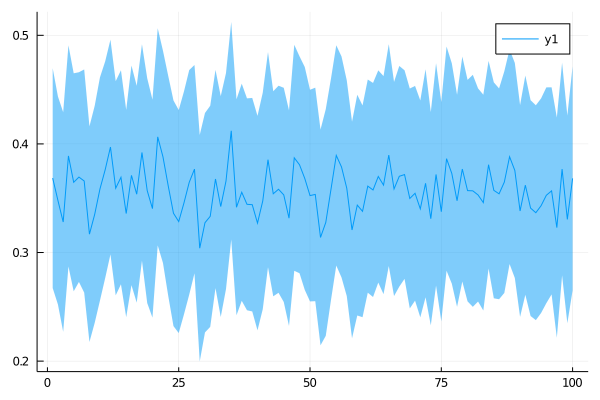

In [118]:
using Plots
plot(mω, ribbon=sqrt.(vω))